# Amazon Product Analysis

#### Libraries Used

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from ydata_profiling import ProfileReport as PR

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Mock Dataset Creation

In [5]:
num_rows = 100

In [6]:
start_date = datetime(2023, 11, 1)
end_date = datetime(2024, 1, 31)
dates = [start_date + timedelta(days=i) for i in range(num_rows)]

In [7]:
clicks = np.random.randint(100, 1000, size=num_rows)
impressions = np.random.randint(1000, 10000, size=num_rows)
conversions = np.random.randint(10, 100, size=num_rows)
sales_revenue = np.random.randint(100, 1000, size=num_rows)
advertising_cost = np.random.randint(10, 1000, size=num_rows)

In [8]:
conversion_rate = (conversions / clicks) * 100
acos = (advertising_cost/sales_revenue) * 100

In [9]:
df = pd.DataFrame({
    'Date': dates,
    'Clicks': clicks,
    'Impressions': impressions,
    'Conversions': conversions,
    'Sales_Revenue': sales_revenue,
    'Advertising_Cost': advertising_cost,
    'Conversion_Rate': conversion_rate,
    'Advertising_Cost_of_Sales': acos
})

In [10]:
df['CTR'] = (df['Clicks'] / df['Impressions']) * 100

In [ ]:
df

## Step 2: Analysis

### Click Through Rate

In [12]:
df.describe()

Date     Clicks  Impressions  Conversions  \
count                  100  100.00000   100.000000   100.000000   
mean   2023-12-20 12:00:00  563.81000  5651.170000    50.940000   
min    2023-11-01 00:00:00  104.00000  1139.000000    10.000000   
25%    2023-11-25 18:00:00  349.25000  3643.000000    28.750000   
50%    2023-12-20 12:00:00  595.00000  5750.000000    47.000000   
75%    2024-01-14 06:00:00  801.00000  7608.500000    71.250000   
max    2024-02-08 00:00:00  993.00000  9885.000000    98.000000   
std                    NaN  269.69484  2449.541895    26.984028   

       Sales_Revenue  Advertising_Cost  Conversion_Rate  \
count     100.000000        100.000000       100.000000   
mean      559.160000        564.880000        13.033969   
min       108.000000         25.000000         1.406926   
25%       317.750000        326.750000         5.308904   
50%       566.500000        586.000000         9.359739   
75%       791.750000        779.750000        13.956608   
max       996.000000        997.000000        79.646018   
std       272.504127        281.944198        13.559484   

       Advertising_Cost_of_Sales         CTR  
count                 100.000000  100.000000  
mean                  150.890757   13.636523  
min                     4.230118    1.407676  
25%                    60.458028    6.007726  
50%                   103.284533   10.069423  
75%                   170.112571   16.125556  
max                   766.923077   81.826163  
std                   152.494739   13.398776

In [13]:
df['Month'] = df['Date'].dt.to_period('M')  # Extract month from date
monthly_avg_ctr = df.groupby('Month')['CTR'].mean()

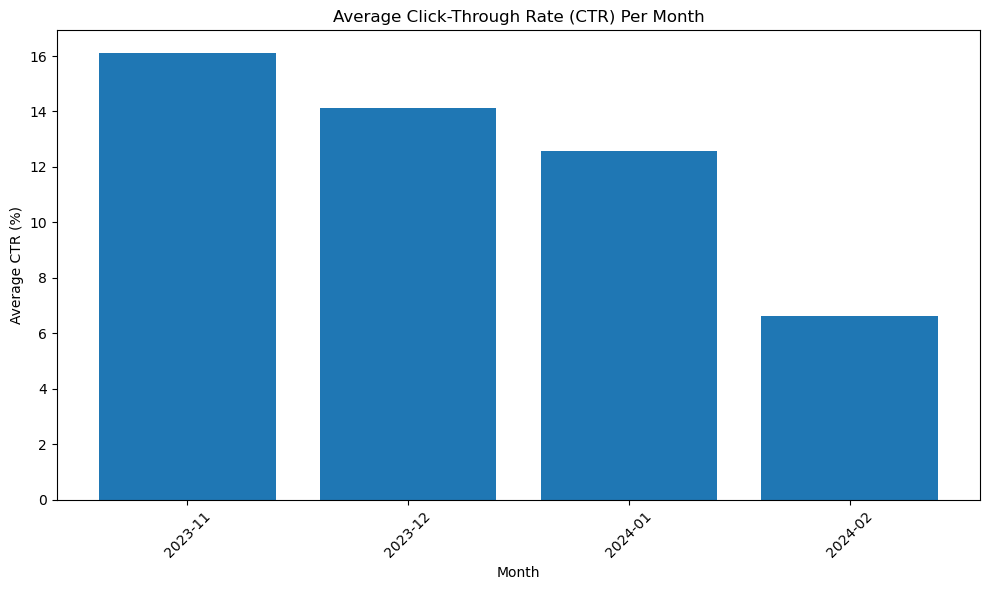

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_ctr.index.astype(str), monthly_avg_ctr)
plt.title('Average Click-Through Rate (CTR) Per Month')
plt.xlabel('Month')
plt.ylabel('Average CTR (%)')
plt.xticks(rotation=45)
plt.tight_layout()

In [15]:
monthly_avg_ctr

Month
2023-11    16.119529
2023-12    14.111144
2024-01    12.566972
2024-02     6.630605
Freq: M, Name: CTR, dtype: float64

The monthly average CTR ranged from approximately 19.27% in January 2024 to around 11.01% February 2024. This notable difference in February's CTR suggests a potential change in ad performance or audience engagement strategies during that period.

### Conversion Analysis

In [16]:
pd.set_option('display.max_rows', None)

In [ ]:
conversion_pivot = pd.pivot_table(df, values='Conversion_Rate', index='Date', aggfunc='mean')
conversion_pivot

In [18]:
conversion_pivot.describe()

Conversion_Rate
count       100.000000
mean         13.033969
std          13.559484
min           1.406926
25%           5.308904
50%           9.359739
75%          13.956608
max          79.646018

In [19]:
monthly_avg_cr = df.groupby('Month')['Conversion_Rate'].mean()
monthly_avg_cr

Month
2023-11    10.241987
2023-12    16.043187
2024-01    11.965616
2024-02    15.983053
Freq: M, Name: Conversion_Rate, dtype: float64

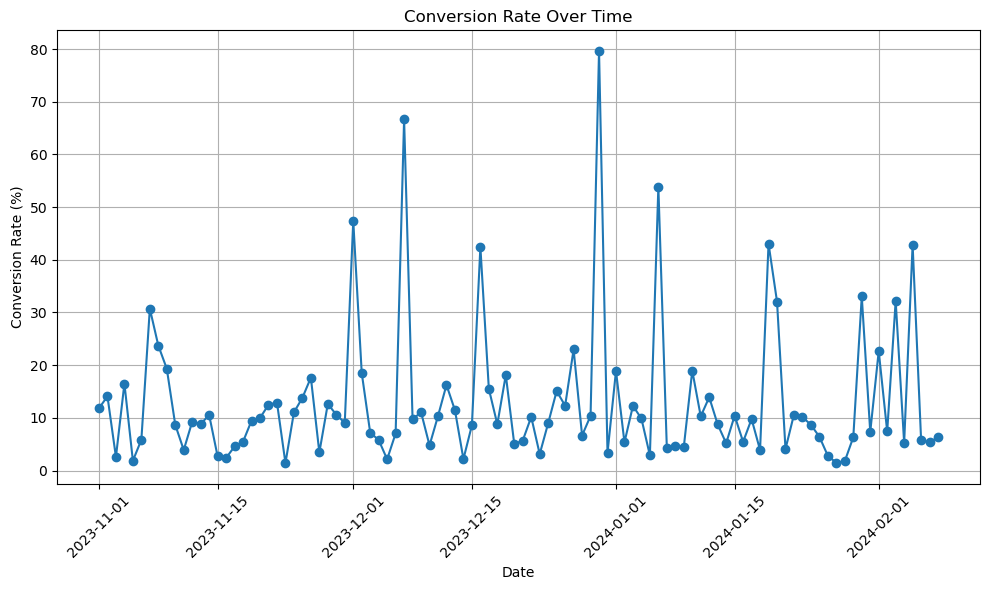

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(conversion_pivot.index, conversion_pivot.values, marker='o', linestyle='-')
plt.title('Conversion Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### Sales Performance

In [ ]:
acos_pivot = pd.pivot_table(df, values='Advertising_Cost_of_Sales', index='Date', aggfunc='mean')
acos_pivot


In [22]:
acos_pivot.describe()

Advertising_Cost_of_Sales
count                 100.000000
mean                  150.890757
std                   152.494739
min                     4.230118
25%                    60.458028
50%                   103.284533
75%                   170.112571
max                   766.923077

In [23]:
monthly_avg_acos = df.groupby('Month')['Advertising_Cost_of_Sales'].mean()
monthly_avg_acos

Month
2023-11    162.130773
2023-12    148.844976
2024-01    156.461811
2024-02     95.080264
Freq: M, Name: Advertising_Cost_of_Sales, dtype: float64

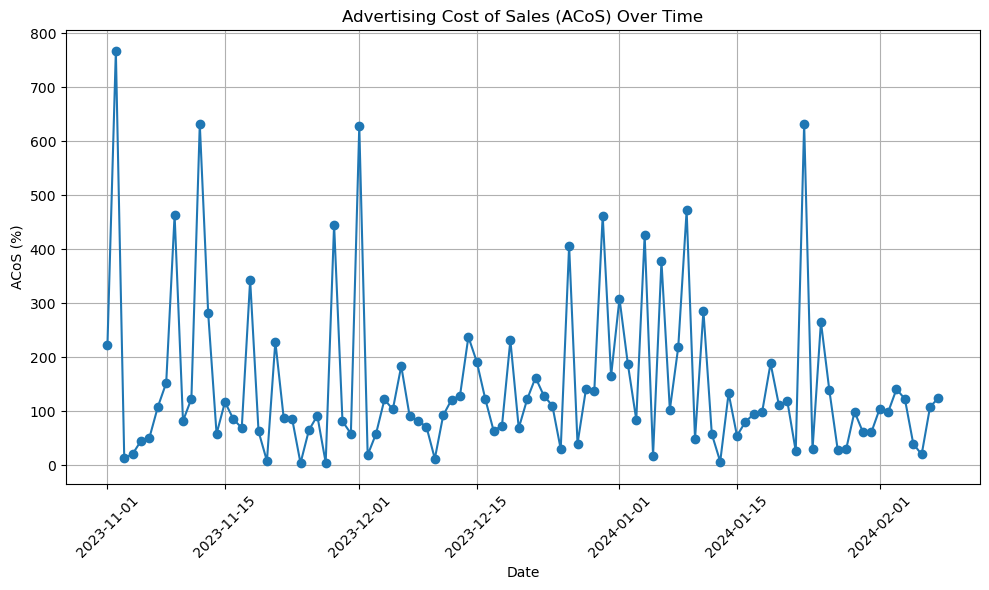

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(acos_pivot.index, acos_pivot.values, marker='o', linestyle='-')
plt.title('Advertising Cost of Sales (ACoS) Over Time')
plt.xlabel('Date')
plt.ylabel('ACoS (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

We can see that December 2023 has the lowest ACoS value of $120.18. Therefore, December 2023 indicates better efficiency compared to the other months in terms of advertising spend relative to sales generated.

## Return on Ad Spent (RoAS)

In [25]:
df['RoAS'] = df['Sales_Revenue'] / df['Advertising_Cost']

In [26]:
monthly_avg_roas = df.groupby('Month')['RoAS'].mean()
monthly_avg_roas

Month
2023-11    3.073318
2023-12    1.349857
2024-01    1.801734
2024-02    1.581980
Freq: M, Name: RoAS, dtype: float64

In [27]:
roas_pivot = pd.pivot_table(df, values='RoAS', index='Date', aggfunc='mean')
roas_pivot.describe()

RoAS
count  100.000000
mean     2.025547
std      3.576617
min      0.130391
25%      0.589051
50%      0.968209
75%      1.654384
max     23.640000

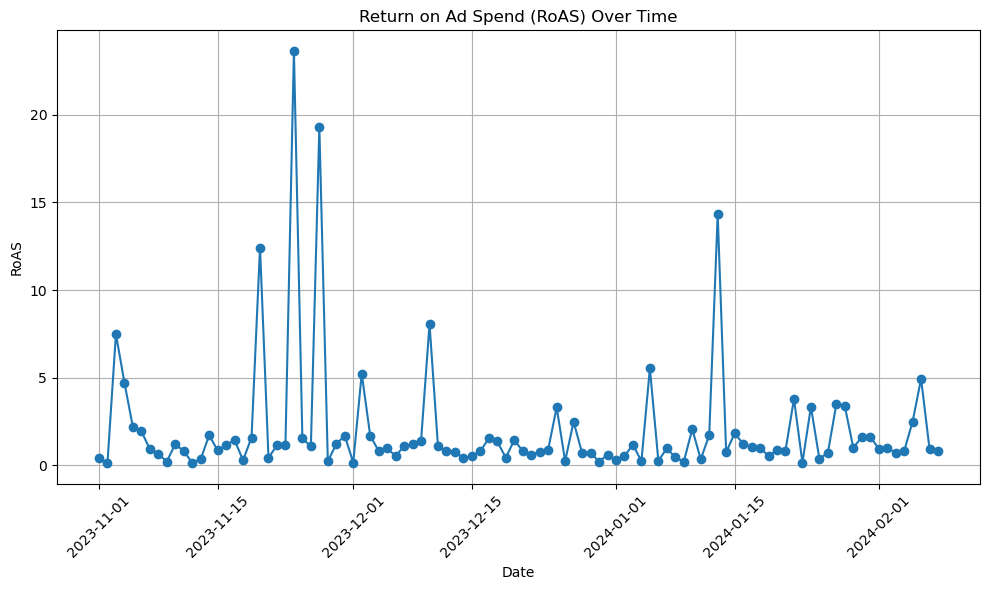

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(roas_pivot.index, roas_pivot.values, marker='o', linestyle='-')
plt.title('Return on Ad Spend (RoAS) Over Time')
plt.xlabel('Date')
plt.ylabel('RoAS')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

We can see that February 2024 has the highest RoAS value of approximately 2.380. Therefore, February 2024 was more profitable compared to the other months in terms of generating revenue relative to advertising spend.

In [30]:
PR(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### These analyses provide valuable insights into the performance of the Amazon PPC campaign for the "100 Pieces Fort Building Kit Plus 5 Light Set for Kids 4-8" product. We can further enhance this dashboard by including additional metrics and visualizations to provide a comprehensive overview of the campaign's effectiveness.

In [32]:
df.to_csv('amazon_ppc.csv')